In [2]:
import tensorflow as tf
import numpy as np
import os
import pathlib
import random
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2

In [4]:
def rename_directory(old_name, bahasa):
    shutil.move(old_name, bahasa+"_"+old_name)

In [5]:
#Mount google drive
!git clone https://github.com/alberth441/Data-Capstone.git

fatal: destination path 'Data-Capstone' already exists and is not an empty directory.


In [6]:
!git clone https://github.com/tnivram/capstone_dataset.git

fatal: destination path 'capstone_dataset' already exists and is not an empty directory.


In [7]:
def folder_label(root,bahasa):
  basedir = root
  for fn in os.listdir(basedir):
    if not os.path.isdir(os.path.join(basedir, fn)):
      print('aman1')
      continue # Not a directory
    if bahasa in fn:
      continue # Already in the correct form
    new_name=bahasa+'_'+fn
    print(new_name)
    os.rename(os.path.join(basedir, fn),
              os.path.join(basedir, new_name))

All Language

In [8]:
path1 = '/content/Data-Capstone/Aksara Bali'
path2= '/content/capstone_dataset/sunda-dataset'
path3 = '/content/Data-Capstone/Jawa mas/v3'

In [10]:
#rename floder bali
folder_label(path1,'bali')
#rename folder jawa
for path in os.listdir(path3):
  folder_path = os.path.join(path3,path)
  for file in os.listdir(folder_path):
    change_path=os.path.join(folder_path,file)
    folder_label(change_path,'jawa')

In [11]:
filepaths=[]
labels=[]

#Input to dataset for sunda aksara
sunda_classlist=os.listdir(path2)
for kelas in sunda_classlist:
    classpath=os.path.join(path2,kelas)
    aksara_class=os.listdir(classpath)
    for aksara in aksara_class:
      aksara_path=os.path.join(classpath,aksara)
      if os.path.isdir(aksara_path):
          flist=os.listdir(aksara_path)
          for f in flist:
              fpath=os.path.join(aksara_path,f)
              filepaths.append(fpath)
              labels.append(aksara)
#INput to dataset for bali aksara
classlist=os.listdir(path1)
for klass in classlist:
    classpath=os.path.join(path1,klass)
    if os.path.isdir(classpath):
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
#Input java aksara to dataset
jawa_classlist=os.listdir(path3)
for lasek in jawa_classlist:
  kelas_path=os.path.join(path3,lasek)
  aksara_jawa=os.listdir(kelas_path)
  for salek in aksara_jawa:
    listing=os.path.join(kelas_path,salek)
    flist=os.listdir(listing)
    for f in flist:
      fpath=os.path.join(listing,f)
      dir_list=os.listdir(fpath)
      for sara in dir_list:
        path_final=os.path.join(fpath,sara)
        filepaths.append(path_final)
        labels.append(f)



Fseries= pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print (df['labels'].value_counts())

                                           filepaths    labels
0  /content/capstone_dataset/sunda-dataset/valida...  sunda_ma
1  /content/capstone_dataset/sunda-dataset/valida...  sunda_ma
2  /content/capstone_dataset/sunda-dataset/valida...  sunda_ma
3  /content/capstone_dataset/sunda-dataset/valida...  sunda_ma
4  /content/capstone_dataset/sunda-dataset/valida...  sunda_ma
jawa_ba     138
jawa_dha    132
jawa_pa     132
jawa_ca     132
jawa_la     132
           ... 
bali_da      45
bali_ta      44
bali_ba      43
bali_ra      31
bali_nga     27
Name: labels, Length: 68, dtype: int64


In [13]:
train_split=0.7
test_split=0.15
dummy_split=test_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

train_df length:  4993   test_df length:  1069   valid_df length:  1071


In [14]:
(train_df['labels'].nunique())

68

In [15]:
height=150
width=150
channels=2
batch_size=64

img_shape=(height, width,channels)
img_size=(height, width)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)

gen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.2,
    fill_mode='nearest'
    )
train_gen=gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                     shuffle=True, batch_size=batch_size)

validgen=ImageDataGenerator(rescale=1./255)
valid_gen=validgen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                      shuffle=True, batch_size=batch_size)

testgen=ImageDataGenerator(rescale=1./255)
test_gen=testgen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                     shuffle=False, batch_size=test_batch_size)

classes=list(train_gen.class_indices.keys())
print (classes)
class_count=len(classes)


test batch size:  1   test steps:  1069
Found 4993 validated image filenames belonging to 68 classes.
Found 1071 validated image filenames belonging to 68 classes.
Found 1069 validated image filenames belonging to 68 classes.
['bali_ba', 'bali_ca', 'bali_da', 'bali_ga', 'bali_ha', 'bali_ja', 'bali_ka', 'bali_la', 'bali_ma', 'bali_na', 'bali_nga', 'bali_nya', 'bali_pa', 'bali_ra', 'bali_sa', 'bali_ta', 'bali_wa', 'bali_ya', 'jawa_ba', 'jawa_ca', 'jawa_da', 'jawa_dha', 'jawa_ga', 'jawa_ha', 'jawa_ja', 'jawa_ka', 'jawa_la', 'jawa_ma', 'jawa_na', 'jawa_nga', 'jawa_nya', 'jawa_pa', 'jawa_ra', 'jawa_sa', 'jawa_ta', 'jawa_tha', 'jawa_wa', 'jawa_ya', 'sunda_a', 'sunda_ae', 'sunda_ba', 'sunda_ca', 'sunda_da', 'sunda_e', 'sunda_eu', 'sunda_fa', 'sunda_ga', 'sunda_ha', 'sunda_i', 'sunda_ja', 'sunda_ka', 'sunda_la', 'sunda_ma', 'sunda_na', 'sunda_nga', 'sunda_nya', 'sunda_o', 'sunda_pa', 'sunda_qa', 'sunda_ra', 'sunda_sa', 'sunda_ta', 'sunda_u', 'sunda_va', 'sunda_wa', 'sunda_xa', 'sunda_ya', 'sun

In [16]:
model_name='Combined+Jawa'
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(rate=0.5),
            tf.keras.layers.Dense(128,activation='relu'),
            tf.keras.layers.Dense(68, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics='accuracy')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.92:
      self.model.stop_training=True

In [20]:
epochs =500
history=model.fit(x=train_gen, epochs=epochs, validation_data=valid_gen,callbacks=myCallback())

Epoch 1/500
79/79 [==============================] - 40s 425ms/step - loss: 4.1535 - accuracy: 0.0238 - val_loss: 4.0224 - val_accuracy: 0.0383
Epoch 2/500
79/79 [==============================] - 33s 413ms/step - loss: 3.7512 - accuracy: 0.0601 - val_loss: 3.2755 - val_accuracy: 0.1289
Epoch 3/500
79/79 [==============================] - 32s 408ms/step - loss: 3.1509 - accuracy: 0.1216 - val_loss: 2.7962 - val_accuracy: 0.2213
Epoch 4/500
79/79 [==============================] - 32s 410ms/step - loss: 2.8999 - accuracy: 0.1670 - val_loss: 2.6085 - val_accuracy: 0.2754
Epoch 5/500
79/79 [==============================] - 34s 435ms/step - loss: 2.7362 - accuracy: 0.2169 - val_loss: 2.5388 - val_accuracy: 0.3007
Epoch 6/500
79/79 [==============================] - 33s 416ms/step - loss: 2.6418 - accuracy: 0.2483 - val_loss: 2.4209 - val_accuracy: 0.3249
Epoch 7/500
79/79 [==============================] - 32s 403ms/step - loss: 2.5663 - accuracy: 0.2590 - val_loss: 2.3246 - val_accuracy:

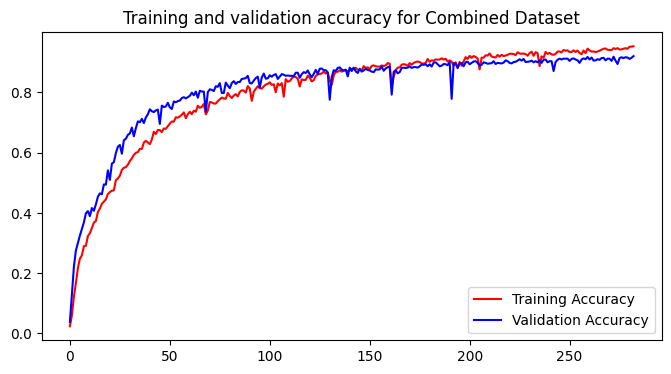

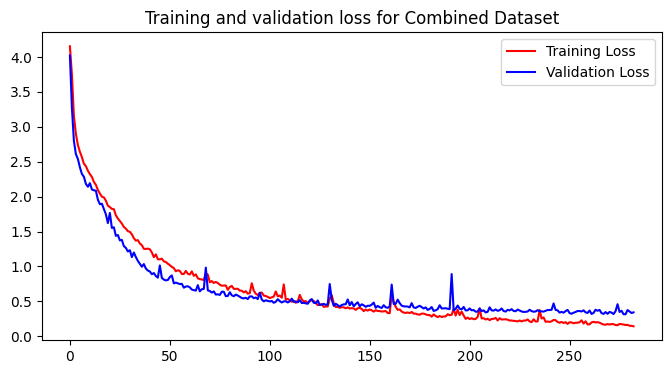

In [21]:
# Plot the training and validation accuracies for each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
fig1 = plt.figure(figsize=(8, 4))
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.title('Training and validation accuracy for Combined Dataset')
plt.savefig('fig1.png')

print("")
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
fig2 = plt.figure(figsize=(8, 4))
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.legend(["Training Loss", "Validation Loss"])
plt.title('Training and validation loss for Combined Dataset')
plt.savefig('fig2.png')

In [22]:
from google.colab import files

files.download('fig1.png')
files.download('fig2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
def download_history():
  import pickle
  from google.colab import files

  with open('ModelFinal.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('ModelFinal.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
model.save('ModelFinal.h5')
files.download('ModelFinal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>